# Load Conf and Credentials

## Load Directory Locations

In [1]:
import json
import os

# Check if the file exists and load the JSON file into a dictionary
file_path = r'C:\Users\mike\Develop\Projects\Code Notebook\Credentials\locations_conf.json'
if os.path.exists(file_path):
    with open(file_path, 'r') as f:
        locations_data = json.load(f)
    print(locations_data)
else:
    print(f"File not found: {file_path}")

{'Common_Funcs_Dir': '/Users/mike/Develop/Projects/Code Notebook/Common/Functions', 'Credentials_Dir': '/Users/mike/Develop/Projects/Code Notebook/Credentials', 'Rel_Pickes_Dir': '../.pickles', 'Pub_Data_Dir': "'/Users/mike/Data/Public", 'BQ_Service_Key': '/Users/mike/Develop/Conf/GCP Service Keys/mikecancell-development-0bcca41f8486.json'}


# Load the DF by Querying Grouped Crime Data from GCP

In [2]:
from google.oauth2 import service_account
import pandas_gbq

# Ensure locations_data is defined
if 'locations_data' not in globals():
	# Check if the file exists and load the JSON file into a dictionary
	if os.path.exists(file_path):
		with open(file_path, 'r') as f:
			locations_data = json.load(f)
	else:
		raise FileNotFoundError(f"File not found: {file_path}")

# Resolve the key path from the locations data
key_path = locations_data.get('BQ_Service_Key', 'default_key_path.json')

# Create credentials using the key file
credentials = service_account.Credentials.from_service_account_file(key_path)

# Define your project ID and the SQL query
project_id = 'mikecancell-development'
query = """
SELECT *
FROM `mikecancell-development.Datasets.LA_Crime_Grouped_By_Month`
"""

# Read the data from BigQuery into a pandas DataFrame
crime_data = pandas_gbq.read_gbq(query, project_id=project_id, credentials=credentials)

# Display the first few rows of the dataframe
print(crime_data.head())

Downloading: 100%|██████████|
  datemon_occ      lat       lon  area_id  fk_crm_cd  crime_count  \
0  2023-10-01  34.2246 -118.5995       21        625            1   
1  2022-11-01  33.9455 -118.4001       14        625            2   
2  2024-08-01  33.9455 -118.4001       14        625            1   
3  2024-09-01  33.9455 -118.4001       14        625            1   
4  2022-11-01  33.9455 -118.4001       14        625            2   

   avg_crimes_per_day  rank_avg_crimes_per_day_by_mon_area_crmcd  \
0                 1.0                                          1   
1                 2.0                                          1   
2                 1.0                                          1   
3                 1.0                                          1   
4                 2.0                                          1   

     crm_cd_desc area_name                                   geo_display_name  
0  OTHER ASSAULT   Topanga      Los Angeles, California, 91303, Un

# Analysis Ideas for Crime Data

## 1. Temporal Analysis
- **Trend Analysis**: Analyze the trend of Violent Crimes over the years, months, and weeks.
- **Seasonal Patterns**: Identify any seasonal patterns in crime occurrences.
- **Time of Day Analysis**: Determine the most common times of day for Violent Crimes to occur.

## 2. Spatial Analysis
- **Crime Hotspots**: Identify geographical areas with high crime rates.
- **Crime Distribution**: Visualize the distribution of different types of Violent Crimes across various areas.
- **Location-Based Analysis**: Analyze Violent Crimes based on specific locations such as streets, neighborhoods, and premises.

## 3. Demographic Analysis
- **Victim Demographics**: Analyze the demographics of crime victims, including age, gender, and descent.
- **Perpetrator Demographics**: If data is available, analyze the demographics of perpetrators.

## 4. Crime Type Analysis
- **Crime Categories**: Analyze the frequency and distribution of different types of Violent Crimes.
- **Weapon Usage**: Examine the types of weapons used in Violent Crimes and their frequency.
- **Premises Analysis**: Analyze the types of premises where Violent Crimes occur most frequently.

## 5. Status Analysis
- **Crime Resolution**: Analyze the status of Violent Crimes (e.g., Adult Other, Invest Cont, Adult Arrest) to understand resolution rates.
- **Unresolved Violent Crimes**: Identify and analyze unresolved Violent Crimes to find patterns or common factors.

## 6. Comparative Analysis
- **Yearly Comparison**: Compare crime statistics year over year to identify trends and changes.
- **Area Comparison**: Compare crime rates and types across different areas to identify high-risk zones.

## 7. Predictive Analysis
- **Crime Prediction**: Use historical data to predict future crime occurrences and hotspots.
- **Risk Assessment**: Develop risk assessment models to identify potential high-risk areas and times.

## 8. Correlation Analysis
- **Crime Correlations**: Identify correlations between different variables such as time, location, victim demographics, and crime types.
- **External Factors**: Analyze the impact of external factors (e.g., economic conditions, public events) on crime rates.

## 9. Visualization
- **Heatmaps**: Create heatmaps to visualize crime hotspots and distribution.
- **Time Series Plots**: Use time series plots to show trends and patterns over time.
- **Bar Charts and Pie Charts**: Visualize the distribution of crime types, victim demographics, and other categorical data.

## 10. Reporting and Dashboards
- **Interactive Dashboards**: Develop interactive dashboards for real-time crime data analysis and visualization.
- **Automated Reports**: Generate automated reports summarizing key findings and trends in the data.

# 1. Temporal Analysis
- **Trend Analysis**: Analyze the trend of Violent Crimes over the years, months, and weeks.
- **Seasonal Patterns**: Identify any seasonal patterns in crime occurrences.
- **Time of Day Analysis**: Determine the most common times of day for Violent Crimes to occur.

## Trend Analysis

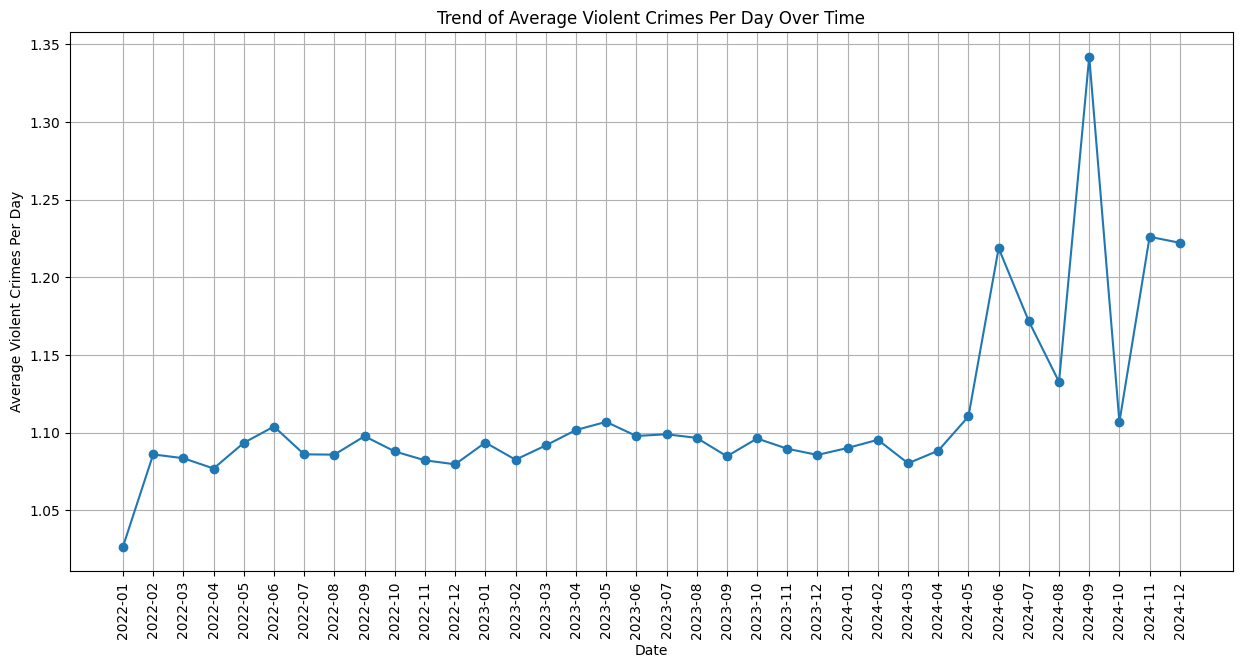

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the 'datemon_occ' column to datetime
crime_data['datemon_occ'] = pd.to_datetime(crime_data['datemon_occ'])

# Group by year and month to analyze the trend of average Violent Crimes per day over time
crime_trend_avg = crime_data.groupby(crime_data['datemon_occ'].dt.to_period('M'))['avg_crimes_per_day'].mean().reset_index()

# Plot the trend of average Violent Crimes per day over time
plt.figure(figsize=(15, 7))
plt.plot(crime_trend_avg['datemon_occ'].astype(str), crime_trend_avg['avg_crimes_per_day'], marker='o')
plt.title('Trend of Average Violent Crimes Per Day Over Time')
plt.xlabel('Date')
plt.ylabel('Average Violent Crimes Per Day')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### Plot the Trend Analysis for the Top Ranked Areas Only
Use a Sliceable Chart for User Interactivity

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Install ipywidgets if not already installed
# %pip install ipywidgets

import ipywidgets as widgets
from ipywidgets import interact

# Filter the crime_data to include only the highest ranked crime areas
top_ranked_areas = crime_data[crime_data['rank_avg_crimes_per_day_by_mon_area_crmcd'] == 1]

# Create a pivot table for the trend of average Violent Crimes per day over time by area
crime_trend_pivot = top_ranked_areas.pivot_table(
    index=top_ranked_areas['datemon_occ'].dt.to_period('M'),
    columns='area_name',
    values='avg_crimes_per_day',
    aggfunc='mean'
)

# Function to plot the trend of average Violent Crimes per day over time for selected areas
def plot_crime_trend(selected_areas):
    plt.figure(figsize=(15, 10))
    for area in selected_areas:
        plt.plot(crime_trend_pivot.index.astype(str), crime_trend_pivot[area], marker='o', label=area)
    plt.title('Trend of Average Violent Crimes Per Day Over Time by Area')
    plt.xlabel('Date')
    plt.ylabel('Average Violent Crimes Per Day')
    plt.xticks(rotation=90)
    plt.legend(title='Area')
    plt.grid(True)
    plt.show()

# Create a multi-select widget for areas
area_selector = widgets.SelectMultiple(
    options=crime_trend_pivot.columns,
    value=[crime_trend_pivot.columns[0]],
    description='Areas',
    disabled=False
)

# Use the interact function to create the slicer interface
interact(plot_crime_trend, selected_areas=area_selector)

interactive(children=(SelectMultiple(description='Areas', index=(0,), options=('77th Street', 'Central', 'Devo…

<function __main__.plot_crime_trend(selected_areas)>

## Seasonal Patterns

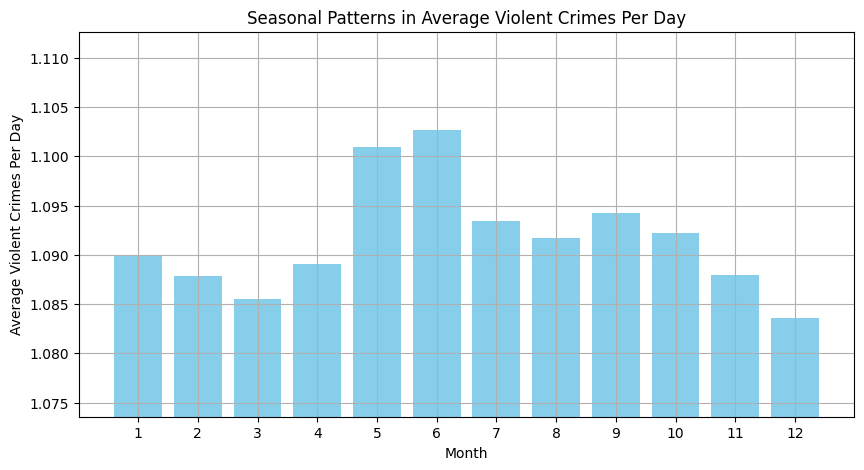

In [14]:
import numpy as np

# Analyze seasonal patterns by grouping by month
crime_data['month'] = crime_data['datemon_occ'].dt.month
seasonal_pattern = crime_data.groupby('month')['avg_crimes_per_day'].mean().reset_index()

# Plot the seasonal patterns
plt.figure(figsize=(10, 5))
plt.bar(seasonal_pattern['month'], seasonal_pattern['avg_crimes_per_day'], color='skyblue')
plt.title('Seasonal Patterns in Average Violent Crimes Per Day')
plt.xlabel('Month')
plt.ylabel('Average Violent Crimes Per Day')
plt.xticks(seasonal_pattern['month'])
plt.ylim(seasonal_pattern['avg_crimes_per_day'].min() - 0.01, seasonal_pattern['avg_crimes_per_day'].max() + 0.01)
plt.grid(True)
plt.show()


### Plot the Seasonal Analysis for the Top Ranked Areas Only
Use a Sliceable Chart for User Interactivity

In [15]:
# Filter the crime_data to include only the highest ranked crime areas
top_ranked_areas = crime_data[crime_data['rank_avg_crimes_per_day_by_mon_area_crmcd'] == 1]

# Analyze seasonal patterns by grouping by month and area
seasonal_pattern_by_area = top_ranked_areas.groupby(['month', 'area_name'])['avg_crimes_per_day'].mean().unstack()

# Function to plot the seasonal patterns for selected areas
def plot_seasonal_pattern(selected_areas):
    plt.figure(figsize=(15, 10))
    for area in selected_areas:
        plt.plot(seasonal_pattern_by_area.index, seasonal_pattern_by_area[area], marker='o', label=area)
    plt.title('Seasonal Patterns in Average Violent Crimes Per Day by Area')
    plt.xlabel('Month')
    plt.ylabel('Average Violent Crimes Per Day')
    plt.xticks(seasonal_pattern_by_area.index)
    plt.legend(title='Area')
    plt.grid(True)
    plt.show()

# Create a multi-select widget for areas
area_selector = widgets.SelectMultiple(
    options=seasonal_pattern_by_area.columns,
    value=[seasonal_pattern_by_area.columns[0]],
    description='Areas',
    disabled=False
)

# Use the interact function to create the slicer interface
interact(plot_seasonal_pattern, selected_areas=area_selector)

interactive(children=(SelectMultiple(description='Areas', index=(0,), options=('77th Street', 'Central', 'Devo…

<function __main__.plot_seasonal_pattern(selected_areas)>

## Most Vieolent Crimes Analysis


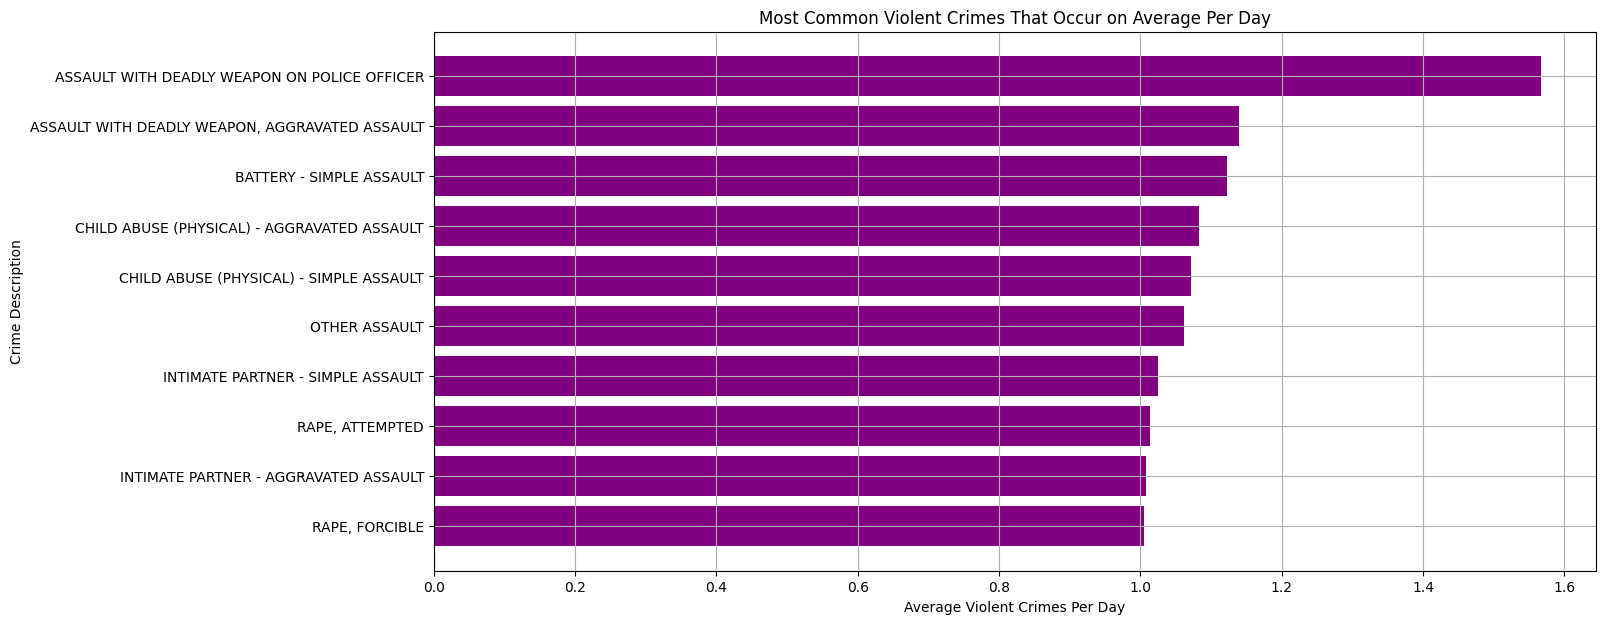

In [16]:
# Analyze the most common Violent Crimes that occur on average per day
common_crimes = crime_data.groupby('crm_cd_desc')['avg_crimes_per_day'].mean().reset_index()
common_crimes = common_crimes.sort_values(by='avg_crimes_per_day', ascending=True).head(10)

# Plot the most common Violent Crimes
plt.figure(figsize=(15, 7))
plt.barh(common_crimes['crm_cd_desc'], common_crimes['avg_crimes_per_day'], color='purple')
plt.title('Most Common Violent Crimes That Occur on Average Per Day')
plt.xlabel('Average Violent Crimes Per Day')
plt.ylabel('Crime Description')
plt.grid(True)
plt.show()


### Plot the Analysis for the Top Ranked Areas Only
Use a Sliceable Chart for User Interactivity

In [17]:
# Filter the common crimes data to include only the highest ranked crime areas
top_ranked_common_crimes = top_ranked_areas.groupby('crm_cd_desc')['avg_crimes_per_day'].mean().reset_index()
top_ranked_common_crimes = top_ranked_common_crimes.sort_values(by='avg_crimes_per_day', ascending=True).head(10)

# Function to plot the most common crimes for selected areas
def plot_common_crimes(selected_areas):
    filtered_data = top_ranked_areas[top_ranked_areas['area_name'].isin(selected_areas)]
    common_crimes_by_area = filtered_data.groupby(['area_name', 'crm_cd_desc'])['avg_crimes_per_day'].mean().unstack()
    
    plt.figure(figsize=(15, 10))
    common_crimes_by_area.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title('Most Common Violent Crimes in Highest Ranked Areas')
    plt.xlabel('Area')
    plt.ylabel('Average Violent Crimes Per Day')
    plt.legend(title='Crime Description')
    plt.grid(True)
    plt.show()

# Use the existing area_selector widget for areas
interact(plot_common_crimes, selected_areas=area_selector)

interactive(children=(SelectMultiple(description='Areas', index=(0,), options=('77th Street', 'Central', 'Devo…

<function __main__.plot_common_crimes(selected_areas)>

# 2. Spatial Analysis
- **Crime Hotspots**: Identify geographical areas with high crime rates.
- **Crime Distribution**: Visualize the distribution of different types of Violent Crimes across various areas.
- **Location-Based Analysis**: Analyze Violent Crimes based on specific locations such as streets, neighborhoods, and premises.

## Violent Crime Hotspots

In [20]:
# %pip install folium

import folium
from folium.plugins import HeatMap

# Create a base map centered closer to the center of Los Angeles
base_map = folium.Map(location=[34.0522, -118.2437], zoom_start=12)

# Prepare data for the heatmap
heat_data = [[row['lat'], row['lon'], row['avg_crimes_per_day']] for index, row in crime_data.iterrows()]

# Add the heatmap to the base map
HeatMap(heat_data).add_to(base_map)

# Display the map
base_map

### Plot the Analysis for the Top Ranked Crimes Only
Use a Sliceable Chart for User Interactivity

In [23]:
import folium
from folium.plugins import HeatMap
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display, HTML

# Function to create a heatmap for selected crimes
def create_heatmap(selected_crimes):
    # Filter the data for the selected crimes
    filtered_data = top_ranked_areas[top_ranked_areas['crm_cd_desc'].isin(selected_crimes)]
    
    # Prepare data for the heatmap
    heat_data = [[row['lat'], row['lon'], row['avg_crimes_per_day']] for index, row in filtered_data.iterrows()]
    
    # Calculate the center of the map based on the filtered data
    if len(heat_data) > 0:
        avg_lat = sum([point[0] for point in heat_data]) / len(heat_data)
        avg_lon = sum([point[1] for point in heat_data]) / len(heat_data)
        base_map = folium.Map(location=[avg_lat, avg_lon], zoom_start=12)
    else:
        base_map = folium.Map(location=[34.0522, -118.2437], zoom_start=12)
    
    # Add the heatmap to the base map
    HeatMap(heat_data).add_to(base_map)
    
    # Display the map with a title
    title_html = '''
        <h3 align="center" style="font-size:20px"><b>Heatmap of Selected Crimes</b></h3>
        '''
    display(HTML(title_html))
    display(base_map)

# Create a multi-select widget for crimes
crime_selector = widgets.SelectMultiple(
    options=top_ranked_common_crimes['crm_cd_desc'],
    value=[top_ranked_common_crimes['crm_cd_desc'].iloc[0]],
    description='Crimes',
    disabled=False
)

# Use the interact function to create the slicer interface
interact(create_heatmap, selected_crimes=crime_selector)

interactive(children=(SelectMultiple(description='Crimes', index=(0,), options=('RAPE, FORCIBLE', 'INTIMATE PA…

<function __main__.create_heatmap(selected_crimes)>

### Plot the Analysis for the Top Ranked Crimes in Top Ranked Areas Only
Use a Sliceable Chart for User Interactivity

In [24]:
import folium
from folium.plugins import HeatMap
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display, HTML

# Function to create a heatmap for selected areas and crimes
def create_heatmap(selected_areas, selected_crimes):
    # Filter the data for the selected areas and crimes
    filtered_data = top_ranked_areas[
        (top_ranked_areas['area_name'].isin(selected_areas)) &
        (top_ranked_areas['crm_cd_desc'].isin(selected_crimes))
    ]
    
    # Prepare data for the heatmap
    heat_data = [[row['lat'], row['lon'], row['avg_crimes_per_day']] for index, row in filtered_data.iterrows()]
    
    # Calculate the center of the map based on the filtered data
    if len(heat_data) > 0:
        avg_lat = sum([point[0] for point in heat_data]) / len(heat_data)
        avg_lon = sum([point[1] for point in heat_data]) / len(heat_data)
        base_map = folium.Map(location=[avg_lat, avg_lon], zoom_start=12)
    else:
        base_map = folium.Map(location=[34.0522, -118.2437], zoom_start=12)
    
    # Add the heatmap to the base map
    HeatMap(heat_data).add_to(base_map)
    
    # Display the map with a title
    title_html = '''
        <h3 align="center" style="font-size:20px"><b>Heatmap of Selected Crimes in Selected Areas</b></h3>
        '''
    display(HTML(title_html))
    display(base_map)

# Create a multi-select widget for crimes
crime_selector = widgets.SelectMultiple(
    options=top_ranked_common_crimes['crm_cd_desc'],
    value=[top_ranked_common_crimes['crm_cd_desc'].iloc[0]],
    description='Crimes',
    disabled=False
)

# Use the existing area_selector widget for areas
interact(create_heatmap, selected_areas=area_selector, selected_crimes=crime_selector)

interactive(children=(SelectMultiple(description='Areas', index=(6, 8), options=('77th Street', 'Central', 'De…

<function __main__.create_heatmap(selected_areas, selected_crimes)>

# 3. Demographic Analysis
- **Victim Demographics**: Analyze the demographics of crime victims, including age, gender, and descent.
- **Perpetrator Demographics**: If data is available, analyze the demographics of perpetrators.
NOTE: The Victim Descent is Not Currently in the Grouped Data, so Demographic Analysis not avail now.

# 4. Crime Type Analysis - Refer to "Plot the Analysis for the Top Ranked Areas Only"
- **Crime Categories**: Analyze the frequency and distribution of different types of Violent Crimes.
- **Weapon Usage**: Examine the types of weapons used in Violent Crimes and their frequency. NOT CURRENTLY in  Dataset
- **Premises Analysis**: Analyze the types of premises where Violent Crimes occur most frequently. NOT CURRENTLY in Dataset

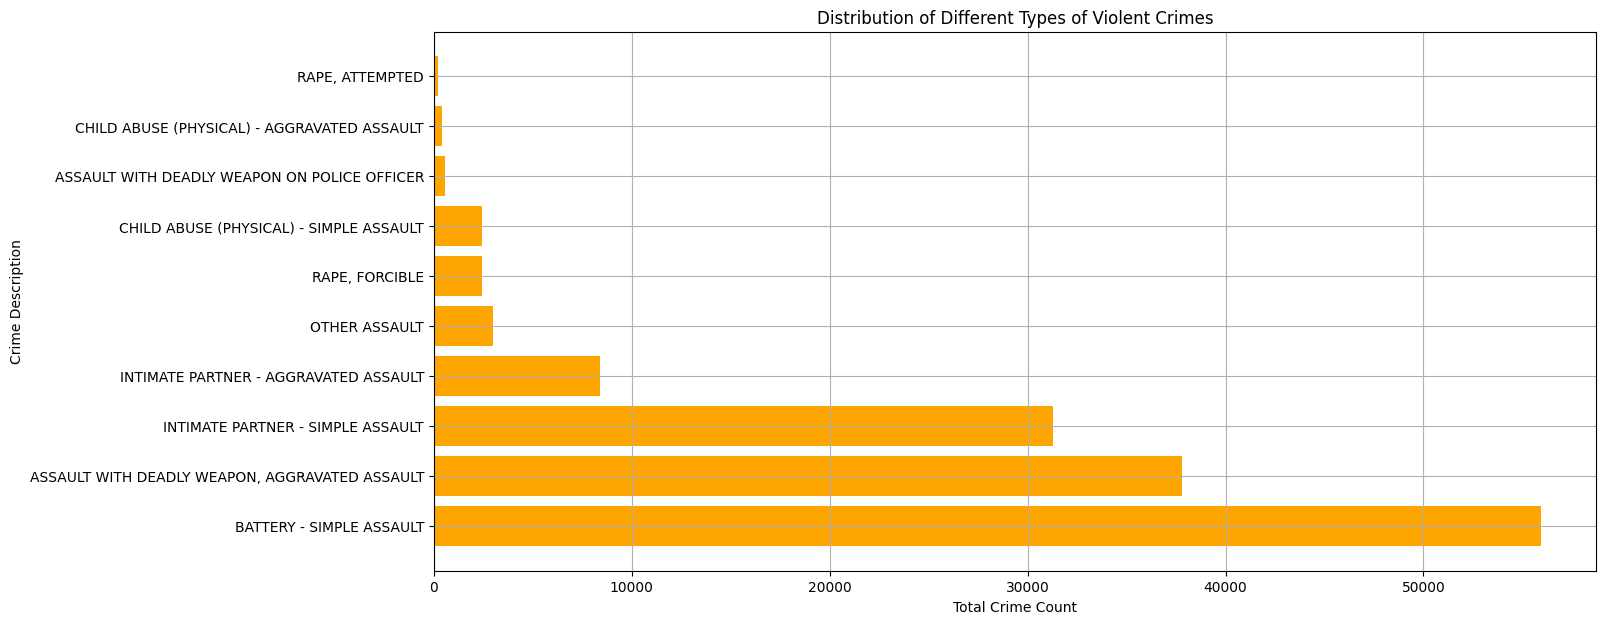

In [26]:
# Group by crime description and calculate the total crime count for each type
crime_distribution = crime_data.groupby('crm_cd_desc')['crime_count'].sum().reset_index()

# Sort the data by total crime count in descending order
crime_distribution = crime_distribution.sort_values(by='crime_count', ascending=False)

# Plot the distribution of different types of Violent Crimes
plt.figure(figsize=(15, 7))
plt.barh(crime_distribution['crm_cd_desc'], crime_distribution['crime_count'], color='orange')
plt.title('Distribution of Different Types of Violent Crimes')
plt.xlabel('Total Crime Count')
plt.ylabel('Crime Description')
plt.grid(True)
plt.show()

# 5. Status Analysis (Data not Current in Dataset)
- **Crime Resolution**: Analyze the status of Violent Crimes (e.g., Adult Other, Invest Cont, Adult Arrest) to understand resolution rates.
- **Unresolved Violent Crimes**: Identify and analyze unresolved Violent Crimes to find patterns or common factors.

# 6. Comparative Analysis
- **Yearly Comparison**: Compare crime statistics year over year to identify trends and changes.
- **Area Comparison**: Compare crime rates and types across different areas to identify high-risk zones.

### Compare YoY by Month

<Figure size 1500x700 with 0 Axes>

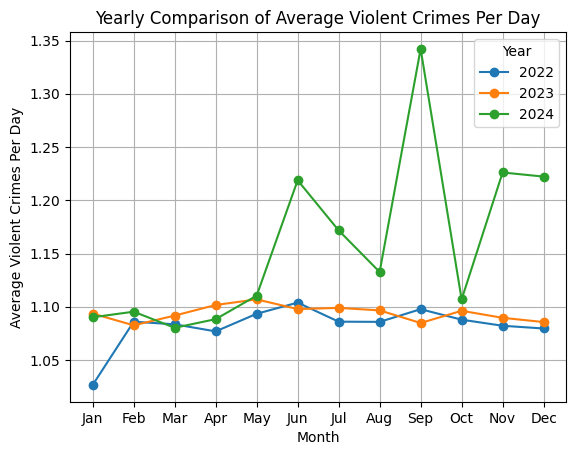

In [27]:
# Extract year and month from the 'datemon_occ' column
crime_data['year'] = crime_data['datemon_occ'].dt.year
crime_data['month'] = crime_data['datemon_occ'].dt.month

# Group by year and month to calculate the average crimes per day
yearly_comparison = crime_data.groupby(['year', 'month'])['avg_crimes_per_day'].mean().unstack(level=0)

# Plot the yearly comparison
plt.figure(figsize=(15, 7))
yearly_comparison.plot(marker='o')
plt.title('Yearly Comparison of Average Violent Crimes Per Day')
plt.xlabel('Month')
plt.ylabel('Average Violent Crimes Per Day')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(title='Year')
plt.show()

### Trend by Area

In [34]:
# Function to plot the trend of average Violent Crimes per day over time for selected areas
def plot_crime_trend(selected_areas):
    plt.figure(figsize=(15, 10))
    for area in selected_areas:
        plt.plot(crime_trend_pivot.index.astype(str), crime_trend_pivot[area], marker='o', label=area)
    plt.title('Trend of Average Violent Crimes Per Day Over Time by Area')
    plt.xlabel('Date')
    plt.ylabel('Average Violent Crimes Per Day')
    plt.xticks(rotation=90)
    plt.legend(title='Area')
    plt.grid(True)
    plt.show()

# Use the existing area_selector widget for areas
interact(plot_crime_trend, selected_areas=area_selector)


interactive(children=(SelectMultiple(description='Areas', index=(4,), options=('77th Street', 'Central', 'Devo…

<function __main__.plot_crime_trend(selected_areas)>

### YoY by Area

In [36]:
# Function to plot the yearly comparison for selected areas
def plot_yearly_comparison(selected_areas):
    plt.figure(figsize=(15, 10))
    for area in selected_areas:
        area_data = crime_data[crime_data['area_name'] == area]
        yearly_comparison_area = area_data.groupby(['year', 'month'])['avg_crimes_per_day'].mean().unstack(level=0)
        yearly_comparison_area.plot(marker='o', ax=plt.gca(), label=area)
    plt.title('Yearly Comparison of Average Violent Crimes Per Day by Area')
    plt.xlabel('Month')
    plt.ylabel('Average Violent Crimes Per Day')
    plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True)
    plt.legend(title='Area')
    plt.show()

# Use the existing area_selector widget for areas
interact(plot_yearly_comparison, selected_areas=area_selector)

interactive(children=(SelectMultiple(description='Areas', index=(4,), options=('77th Street', 'Central', 'Devo…

<function __main__.plot_yearly_comparison(selected_areas)>

# 7. Predictive Analysis
- **Crime Prediction**: Use historical data to predict future crime occurrences and hotspots.
- **Risk Assessment**: Develop risk assessment models to identify potential high-risk areas and times.

### ARIMA Model Regression for Predictions

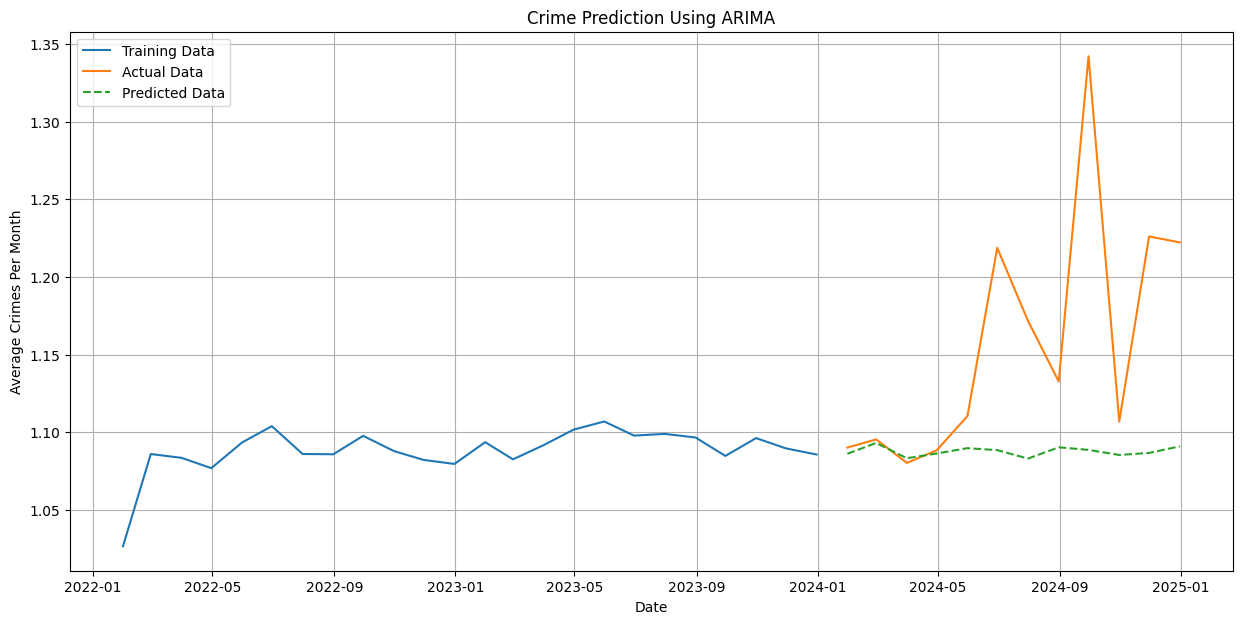

In [60]:
# %pip install statsmodels

from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Ensure 'datemon_occ' column exists and is in datetime format
if 'datemon_occ' not in crime_data.columns:
    crime_data.reset_index(inplace=True)
crime_data['datemon_occ'] = pd.to_datetime(crime_data['datemon_occ'])

# Ensure 'avg_crimes_per_day' column is numeric and handle NaNs
crime_data['avg_crimes_per_day'] = pd.to_numeric(crime_data['avg_crimes_per_day'], errors='coerce')
crime_data['avg_crimes_per_day'] = crime_data['avg_crimes_per_day'].fillna(0)

# Prepare the data for time series forecasting
crime_data.set_index('datemon_occ', inplace=True)
crime_data.sort_index(inplace=True)

# Ensure all columns used in aggregation are numeric
crime_data['avg_crimes_per_day'] = pd.to_numeric(crime_data['avg_crimes_per_day'], errors='coerce')

# Aggregate the data by month and calculate the average crimes per month
monthly_crime_data = crime_data['avg_crimes_per_day'].resample('ME').mean()

# Split the data into training and testing sets
train_data = monthly_crime_data[:'2023-12']
test_data = monthly_crime_data['2024-01':]

# Fit the ARIMA model with increased iterations and different optimization method
model = ARIMA(train_data, order=(5, 1, 0))
model_fit = model.fit(method_kwargs={"maxiter": 200, "disp": 0})

# Make predictions
predictions = model_fit.forecast(steps=len(test_data))

# Plot the actual vs predicted values
plt.figure(figsize=(15, 7))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Data')
plt.plot(test_data.index, predictions, label='Predicted Data', linestyle='--')
plt.title('Crime Prediction Using ARIMA')
plt.xlabel('Date')
plt.ylabel('Average Crimes Per Month')
plt.legend()
plt.grid(True)
plt.show()

# Reset the index of crime_data to its original state
crime_data.reset_index(inplace=True)


## ARMIS Predictions by Area

In [62]:
import ipywidgets as widgets
from ipywidgets import interact
from statsmodels.tsa.arima.model import ARIMA

import matplotlib.pyplot as plt

# Function to fit ARIMA model and plot predictions for selected areas
def plot_arima_predictions(selected_areas):
    plt.figure(figsize=(15, 10))
    
    for area in selected_areas:
        # Filter data for the selected area
        area_data = top_ranked_areas[top_ranked_areas['area_name'] == area].copy()
        
        # Prepare the data for time series forecasting
        area_data.set_index('datemon_occ', inplace=True)
        area_data.sort_index(inplace=True)
        
        # Aggregate the data by month and calculate the average crimes per month
        monthly_area_data = area_data['avg_crimes_per_day'].resample('ME').mean()
        
        # Split the data into training and testing sets
        train_data = monthly_area_data[:'2023-12']
        test_data = monthly_area_data['2024-01':]
        
        # Fit the ARIMA model
        model = ARIMA(train_data, order=(5, 1, 0))
        model_fit = model.fit(method_kwargs={"maxiter": 200, "disp": 0})
        
        # Make predictions
        predictions = model_fit.forecast(steps=len(test_data))
        
        # Plot the actual vs predicted values
        plt.plot(train_data.index, train_data, label=f'{area} - Training Data')
        plt.plot(test_data.index, test_data, label=f'{area} - Actual Data')
        plt.plot(test_data.index, predictions, label=f'{area} - Predicted Data', linestyle='--')
    
    plt.title('Crime Prediction Using ARIMA by Area')
    plt.xlabel('Date')
    plt.ylabel('Average Crimes Per Month')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create a multi-select widget for areas
area_selector = widgets.SelectMultiple(
    options=top_ranked_areas['area_name'].unique(),
    value=[top_ranked_areas['area_name'].unique()[0]],
    description='Areas',
    disabled=False
)

# Use the interact function to create the slicer interface
interact(plot_arima_predictions, selected_areas=area_selector)

interactive(children=(SelectMultiple(description='Areas', index=(0,), options=('Topanga', 'Pacific', 'Wilshire…

<function __main__.plot_arima_predictions(selected_areas)>

# 8. Correlation Analysis
- **Crime Correlations**: Identify correlations between different variables such as time, location, victim demographics, and crime types.
- **External Factors**: Analyze the impact of external factors (e.g., economic conditions, public events) on crime rates.